In [ ]:
!pip install hypernetx

     |████████████████████████████████| 84 kB 1.8 MB/s 


In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import networkx as nx
import hypernetx as hnx
import spacy
nlp = spacy.load('en_core_web_sm')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
import numpy as np

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


# Preprocessing

In [ ]:
paragraph = '''Four groups that advocate for immigrant rights said Thursday they will challenge Arizona\'s new immigration law, which allows police to ask anyone for proof of legal U.S. residency.\n\nThe Mexican American Legal Defense and Educational Fund, the American Civil Liberties Union, the ACLU of Arizona and the National Immigration Law Center held a news conference Thursday in Phoenix to announce the legal challenge.\n\n"The Arizona community can be assured that a vigorous and sophisticated legal challenge will be mounted, in advance of SB1070\'s implementation, seeking to prevent this unconstitutional and discriminatory law from ever taking effect," said Thomas A. Saenz, president of the Mexican American Legal Defense and Educational Fund, known as MALDEF.\n\n"This law will only make the rampant racial profiling of Latinos that is already going on in Arizona much worse," said Alessandra Soler Meetze, executive director of the ACLU of Arizona. "If this law were implemented, citizens would effectively have to carry \'their papers\' at all times to avoid arrest. It is a low point in modern America when a state law requires police to demand documents from people on the street."\n\nRepublican Arizona Gov. Jan Brewer signed the law last week. It goes into effect 90 days after the close of the legislative session, which has not been determined.\n\nBrewer and others who support the law say it does not involve racial profiling or any other illegal acts.\n\n"Racial profiling is illegal," Brewer said after signing the bill Friday. "It is illegal in America, and it\'s certainly illegal in Arizona."\n\nThe National Coalition Of Latino Clergy & Christian Leaders said Sunday it also planned legal action.\n\n"Our churches and pastors in Arizona are outraged about the significant threat this anti-immigrant law will have in the lives of Arizona\'s Latinos," said the Rev. Miguel Rivera, the group\'s chairman.\n\n"This policy violates the rights of American citizens, particularly the fast-growing Latino population of Arizona, by eliminating the basic right of due process, which we are certain that the courts will agree," Rivera said.\n\nThe law requires immigrants to carry their alien registration documents at all times and requires police to question people if there is reason to suspect they\'re in the United States illegally. The measure makes it a state crime to live or travel through Arizona illegally.\n\nIt also targets those who hire illegal immigrant day laborers or knowingly transport them.\n\nIn addition to signing the law, Brewer also issued an executive order that requires training for local officers on how to implement the law without engaging in racial profiling or discrimination.\n\n"This training will include what does and does not constitute reasonable suspicion that a person is not legally present in the United States," she said.\n\nSome officials in Arizona have expressed their displeasure with the measure. Phoenix Mayor Phil Gordon said Thursday that he is "very disappointed."\n\nHe said he is concerned that calls to boycott Arizona businesses and tourism will harm the state.\n\n"I\'m very incredulous that our state leaders -- our so-called leaders -- have allowed our state to be split when we\'re suffering economic hardships," Gordon told CNN.\n\nOther critics say the bill is unconstitutional and will trample residents\' civil rights.\n\n"Quite simply, this law is a civil rights disaster and an insult to American values," said Mary Bauer, legal director of the Southern Poverty Law Center. "No one in our country should be required to produce their \'papers\' or demand to prove their innocence. What kind of country are we becoming?"\n\nBut a national Republican leader said Thursday that Arizona is just filling a void left by the federal government.\n\n"I think the people of Arizona have a right to pass their laws under the 10th Amendment," House Minority Leader John Boehner said. "I think it is clearly a result of the federal government\'s failure to secure our border and to enforce our laws."\n\nGordon said the real solution is comprehensive immigration reform that would allow more immigrants to legally enter the United States.\n\n"This law doesn\'t accomplish that," he said. "It doesn\'t do anything on that."\n\nPresident Obama has called on Congress to pass a comprehensive immigration reform law this year. CNN has learned that Senate Majority Leader Harry Reid and other top Democratic senators will unveil the outlines of that legislation late Thursday.\n\nBut Boehner said at a briefing Thursday that "there\'s not a chance" that Congress will approve the measure this year, especially after the recent passage of a health care reform bill.\n\n"I\'ve been out here for a little while and know that in the middle of an election year, after we\'ve had bills like health care shoved down our throats and the process twisted, tortured, pressured, bribed, you cannot do a serious piece of legislation of this size, with this difficulty, in this environment," he said. "And it\'s nothing more than a cynical ploy to try and engage voters, some segment of voters, to show up in this November\'s elections."\n\nThe Arizona measure has drawn sharp criticism from the Mexican government, which issued an advisory to its citizens this week. The secretary general of the Organization of American States and some member states also expressed concerns about the law Wednesday.\n\n"This is an issue of concern to all citizens of the Americas, beginning with the citizens of the United States, a country with a very rich tradition of immigration and respect for immigrants who have come to lead a better life," OAS Secretary General Jose Miguel Insulza said. "The rich tradition we all admire, of recognizing immigrants in the United States, has been harmed, undermined."\n\nThe uproar caused by the law has even spread to the nation\'s pastime. Protesters plan to demonstrate against the Arizona Diamondbacks baseball team Thursday outside Wrigley Field in Chicago, Illinois.\n\nIn Arizona, two popular singers also will voice their opposition.\n\nGrammy Award-winning Colombian singer Shakira is scheduled to meet with Gordon on Thursday evening.\n\nSinger-songwriter Linda Ronstadt, an Arizona native of Mexican and German descent, also attended the Thursday afternoon rally with the immigrant rights groups.\n\n"What Gov. Brewer signed into law last week is a piece of legislation that threatens the very heart of this great state," Ronstadt said. "We must come together and stop SB1070 from pitting neighbor against neighbor to the detriment of us all."\n\nFederal officials estimate there are about 10.8 million illegal immigrants in the United States, of which about 6.6 million come from Mexico and 760,000 from the rest of Latin America. About 1 million come from Asia.\n\nArizona, which is on the Mexican border, has about 460,000 undocumented immigrants, the federal government says. At least five other states, including California, with 2.6 million, have more undocumented immigrants, the government says.\n\nThe other states with more illegal immigrants than Arizona are Texas, Florida, New York and Georgia.\n\nA Pew Research Center survey late last year found that Americans believe Latinos are discriminated against more than any other major racial or ethnic group in American society.\n\nThe Pew survey also indicated that about one-third of the nation\'s Latinos say they or someone they know has experienced discrimination. About 9 percent said they had been stopped by police or other authorities and asked about their immigration status in the year before the survey.\n\nFifty-seven percent of those surveyed said they worried that they, a family member or a close friend could be deported.\n\n'''

In [ ]:
paragraph = nlp(paragraph)

In [ ]:
type(paragraph)

spacy.tokens.doc.Doc

In [ ]:
for sents in paragraph.sents:
    print(sents.text)
    print(type(sents))

Four groups that advocate for immigrant rights said Thursday they will challenge Arizona's new immigration law, which allows police to ask anyone for proof of legal U.S. residency.


<class 'spacy.tokens.span.Span'>
The Mexican American Legal Defense and Educational Fund, the American Civil Liberties Union, the ACLU of Arizona and the National Immigration Law Center held a news conference Thursday in Phoenix to announce the legal challenge.


<class 'spacy.tokens.span.Span'>
"The Arizona community can be assured that a vigorous and sophisticated legal challenge will be mounted, in advance of SB1070's implementation, seeking to prevent this unconstitutional and discriminatory law from ever taking effect," said Thomas A. Saenz, president of the Mexican American Legal Defense and Educational Fund, known as MALDEF.


<class 'spacy.tokens.span.Span'>
"This law will only make the rampant racial profiling of Latinos that is already going on in Arizona much worse," said Alessandra Soler Meetze

In [ ]:
paragraph

Reviving the practice of using elements of popular music in classical composition, an approach that had been in hibernation in the United States during the 1960s, composer Philip Glass (born 1937) embraced the ethos of popular music in his compositions. Glass based two symphonies on music by rock musicians David Bowie and Brian Eno, but the symphonies' sound is distinctively his. Popular elements do not appear out of place in Glass's classical music, which from its early days has shared certain harmonies and rhythms with rock music. Yet this use of popular elements has not made Glass a composer of popular music. His music is not a version of popular music packaged to attract classical listeners; it is high art for listeners steeped in rock rather than the classics.

Because most of the words in a sentence are not useful to determine the importance, we only consider the words with NOUN, PROPN, VERB POS tags.

In [ ]:
candidate_pos = ['NOUN', 'PROPN', 'VERB']
sentences = []

for sent in paragraph.sents:
    selected_words = []
    for token in sent:
        if token.pos_ in candidate_pos and token.is_stop is False:
            selected_words.append(token)
    sentences.append(selected_words)


In [ ]:
print(sentences)

[[Reviving, practice, elements, music, composition, approach, hibernation, United, States, 1960s, composer, Philip, Glass, born, embraced, ethos, music, compositions], [Glass, based, symphonies, music, rock, musicians, David, Bowie, Brian, Eno, symphonies, sound], [elements, appear, place, Glass, music, days, shared, harmonies, rhythms, rock, music], [use, elements, Glass, composer, music], [music, version, music, packaged, attract, listeners, art, listeners, steeped, rock, classics]]


In [ ]:
type(sentences)

list

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
# convert every word in sentences list to string

for i in range(len(sentences)):
  for j in range(len(sentences[i])):
    sentences[i][j] = str(sentences[i][j])
    sentences[i][j] = lemmatizer.lemmatize(sentences[i][j])

In [ ]:
print(sentences)

[['Reviving', 'practice', 'element', 'music', 'composition', 'approach', 'hibernation', 'United', 'States', '1960s', 'composer', 'Philip', 'Glass', 'born', 'embraced', 'ethos', 'music', 'composition'], ['Glass', 'based', 'symphony', 'music', 'rock', 'musician', 'David', 'Bowie', 'Brian', 'Eno', 'symphony', 'sound'], ['element', 'appear', 'place', 'Glass', 'music', 'day', 'shared', 'harmony', 'rhythm', 'rock', 'music'], ['use', 'element', 'Glass', 'composer', 'music'], ['music', 'version', 'music', 'packaged', 'attract', 'listener', 'art', 'listener', 'steeped', 'rock', 'classic']]


In [ ]:
lemmatizer.lemmatize("Reviving")

'Reviving'

In [ ]:
paragraph.sents

#Hypergraph creation -
Every sentence is one edge 
 

In [ ]:
edges = {}

for i in range(len(sentences)):
  edges[i] = tuple(sentences[i])


In [ ]:
# edges

In [ ]:
H = hnx.Hypergraph(edges)

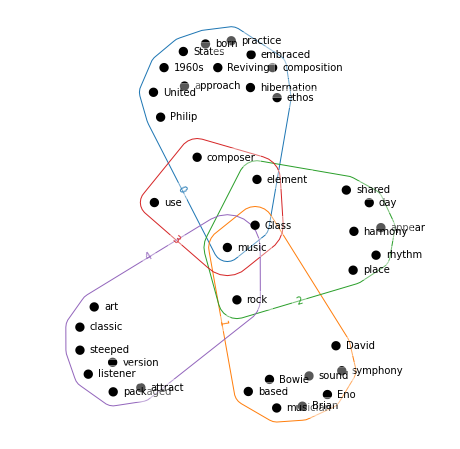

In [ ]:
hnx.draw(H)

In [ ]:
H.dim(3), H.size(3)

(4, 5)

HyperGraph Representations

In [ ]:
print(H.incidence_dict)

{0: {'Philip', 'Glass', 'music', 'United', '1960s', 'hibernation', 'embraced', 'born', 'ethos', 'practice', 'element', 'Reviving', 'States', 'composition', 'composer', 'approach'}, 1: {'Glass', 'music', 'Brian', 'sound', 'musician', 'Eno', 'symphony', 'David', 'based', 'rock', 'Bowie'}, 2: {'Glass', 'music', 'place', 'day', 'shared', 'rhythm', 'element', 'harmony', 'appear', 'rock'}, 3: {'Glass', 'music', 'use', 'element', 'composer'}, 4: {'music', 'steeped', 'listener', 'attract', 'version', 'classic', 'art', 'packaged', 'rock'}}


In [ ]:
len(list(H.nodes))  # 40 words in all 

39

In [ ]:
H.edges

EntitySet(:Edges,[0, 1, 2, 3, 4],{'weight': 1.0})

In [ ]:
M_incidence = H.incidence_matrix()
M_incidence.toarray()

array([[1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [1, 0, 1, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 1, 0, 1],
       [0, 1, 0, 0, 0]], dtype=int64)

# Sentence Scoring 

In [ ]:
paragraph = 'four groups advocate immigrant rights said thursday challenge arizona new immigration law allows police ask anyone proof legal us residency mexican american legal defense educational fund american civil liberties union aclu arizona national immigration law center held news conference thursday phoenix announce legal challenge arizona community assured vigorous sophisticated legal challenge mounted advance sb implementation seeking prevent unconstitutional discriminatory law ever taking effect said thomas saenz president mexican american legal defense educational fund known maldef law make rampant racial profiling latinos already going arizona much worse said alessandra soler meetze executive director aclu arizona law implemented citizens would effectively carry papers times avoid arrest low point modern america state law requires police demand documents people street republican arizona gov jan brewer signed law last week goes effect days close legislative session determined brewer others support law say involve racial profiling illegal acts racial profiling illegal brewer said signing bill friday illegal america certainly illegal arizona national coalition latino clergy christian leaders said sunday planned legal action churches pastors arizona outraged significant threat anti immigrant law lives arizona latinos said rev miguel rivera group chairman policy violates rights american citizens particularly fast growing latino population arizona eliminating basic right due process certain courts agree rivera said law requires immigrants carry alien registration documents times requires police question people reason suspect united states illegally measure makes state crime live travel arizona illegally targets hire illegal immigrant day laborers knowingly transport addition signing law brewer issued executive order requires training local officers implement law without engaging racial profiling discrimination training include constitute reasonable suspicion person legally present united states said officials arizona expressed displeasure measure phoenix mayor phil gordon said thursday disappointed said concerned calls boycott arizona businesses tourism harm state incredulous state leaders called leaders allowed state split suffering economic hardships gordon told cnn critics say bill unconstitutional trample residents civil rights quite simply law civil rights disaster insult american values said mary bauer legal director southern poverty law center country required produce papers demand prove innocence kind country becoming national republican leader said thursday arizona filling void left federal government think people arizona right pass laws th amendment house minority leader john boehner said think clearly result federal government failure secure border enforce laws gordon said real solution comprehensive immigration reform would allow immigrants legally enter united states law accomplish said anything president obama called congress pass comprehensive immigration reform law year cnn learned senate majority leader harry reid top democratic senators unveil outlines legislation late thursday boehner said briefing thursday chance congress approve measure year especially recent passage health reform bill little know middle election year bills like health shoved throats process twisted tortured pressured bribed serious piece legislation size difficulty environment said nothing cynical ploy try engage voters segment voters show november elections arizona measure drawn sharp criticism mexican government issued advisory citizens week secretary general organization american states member states expressed concerns law wednesday issue concern citizens americas beginning citizens united states country rich tradition immigration respect immigrants lead better life oas secretary general jose miguel insulza said rich tradition admire recognizing immigrants united states harmed undermined uproar caused law even spread nation pastime protesters plan demonstrate arizona diamondbacks baseball team thursday outside wrigley field chicago illinois arizona two popular singers voice opposition grammy award winning colombian singer shakira scheduled meet gordon thursday evening singer songwriter linda ronstadt arizona native mexican german descent attended thursday afternoon rally immigrant rights groups gov brewer signed law last week piece legislation threatens heart great state ronstadt said must together stop sb pitting neighbor neighbor detriment us federal officials estimate million illegal immigrants united states million mexico rest latin america million asia arizona mexican border undocumented immigrants federal government says least five states including california million undocumented immigrants government says states illegal immigrants arizona texas florida new york georgia pew research center survey late last year found americans believe latinos discriminated major racial ethnic group american society pew survey indicated third nation latinos say someone know experienced discrimination percent said stopped police authorities asked immigration status year survey fifty seven percent surveyed said worried family member close friend could deported'

In [ ]:
import numpy as np

In [ ]:
# similarity function for two sentences

def sim(s1, s2):
  l1 = len(s1)
  l2 = len(s2)

  s = 0 # number of words that are common in both the sentences

  s1_list = s1.split(" ")
  s2_list = s2.split(" ")

  s = len(list(set(s1_list)&set(s2_list)))

  # print("s = ", s)

  return s/(np.log(l1) + np.log(l2))

In [ ]:
sim("hi there", "hi hi")  # number of common words here = 1

0.27108503068181683

In [ ]:
# find similarity matrix from given dataframe 

# 2nd parameter -> column number in the dataframe that contains sentences

def find_sim_matrix(df, sentences_col_number):
  rows, cols = (df.shape[0], df.shape[0])  # both will be the number of rows in df
  print("rows = ", rows)

  sim_matrix = [[0]*cols]*rows  # dummy matrix of required size 
  print("sim_matrix = ", sim_matrix)

  for i in range(0, rows):
    print(df.iloc[i, sentences_col_number])
    print("type of sentence =", type(df.iloc[i, sentences_col_number]))
    for j in range(0, cols):
      print("sim_matrix = ", sim_matrix)
      print(df.iloc[j, sentences_col_number])
      sim_val = sim(df.iloc[i, sentences_col_number], df.iloc[j, sentences_col_number])  # shoot sim_val is of type <class 'numpy.float64'>, needs to be converted to int 
      print("sim val type = ", type(sim_val))
      sim_val = float(sim_val)
      print("sim val type = ", type(sim_val))
      print("sim val", sim_val)
      sim_matrix[i][j] = sim_val
      print("sim_matrix = ", sim_matrix)

      print(sim_val)
      print(sim_matrix)
    print("bye")
    print("---------------")

  return sim_matrix


In [ ]:
sentences = ["i love python coding", "coding in python is easy", "coding coding"]
df = pd.DataFrame(sentences)

In [ ]:
matrix = find_sim_matrix(df, 0)

rows =  3
sim_matrix =  [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
i love python coding
type of sentence = <class 'str'>
sim_matrix =  [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
i love python coding
sim val type =  <class 'numpy.float64'>
sim val type =  <class 'float'>
sim val 0.6676164013906681
sim_matrix =  [[0.6676164013906681, 0, 0], [0.6676164013906681, 0, 0], [0.6676164013906681, 0, 0]]
0.6676164013906681
[[0.6676164013906681, 0, 0], [0.6676164013906681, 0, 0], [0.6676164013906681, 0, 0]]
sim_matrix =  [[0.6676164013906681, 0, 0], [0.6676164013906681, 0, 0], [0.6676164013906681, 0, 0]]
coding in python is easy
sim val type =  <class 'numpy.float64'>
sim val type =  <class 'float'>
sim val 0.32395032259636697
sim_matrix =  [[0.6676164013906681, 0.32395032259636697, 0], [0.6676164013906681, 0.32395032259636697, 0], [0.6676164013906681, 0.32395032259636697, 0]]
0.32395032259636697
[[0.6676164013906681, 0.32395032259636697, 0], [0.6676164013906681, 0.32395032259636697, 0], [0.6676164013906681, 0.3239

In [ ]:
matrix

[[0.17983406825924927, 0.1741249251128178, 0.19493562262564004],
 [0.17983406825924927, 0.1741249251128178, 0.19493562262564004],
 [0.17983406825924927, 0.1741249251128178, 0.19493562262564004]]

In [ ]:
sim(sentences[0], sentences[1])

0.32395032259636697

In [ ]:
import pickle
import pandas as pd


In [ ]:
data = pd.read_pickle('dtm.pkl')

In [ ]:
data.head()

,0
0,four groups that advocate for immigrant rights...
1,the mexican american legal defense and educati...
2,the arizona community can be assured that a v...
3,this law will only make the rampant racial pr...
4,if this law were implemented citizens would ...


In [ ]:
matrix = find_sim_matrix(data, 0)

rows =  61
sim_matrix =  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
matrix

[[0.5013998912481213,
  0.2938736419856914,
  0.5660801158393857,
  0.3998052881549276,
  0.10490192332699273,
  0.20980384665398547,
  0.12634849044669888,
  0.11957942817513753,
  0.31934448336892585,
  0.21201974171226026,
  0.22051730652851684,
  0.1114979068255018,
  0.31934448336892585,
  0.30405241581725717,
  0.11957942817513753,
  0.3925120651929257,
  0.19916720856728706,
  0.32792005294355403,
  0.32331303040523496,
  0.2984444166250057,
  0.40803818852921836,
  0.10977120917354886,
  0.3317922185637274,
  0.32072408477013153,
  0.30330262339892805,
  0.10803265684400554,
  0.4077654271154045,
  0.3186793085982794,
  0.23762254877422878,
  0.4203746362539684,
  0.41565737351258625,
  0.3152809771904763,
  0.31001460986741003,
  0.3503316946954337,
  0.24167341279594826,
  0.21405319858793342,
  0.3068634375432004,
  0.5005701671429148,
  0.47461449810611467,
  0.31001460986741003,
  0.10399977519340445,
  0.310497118423813,
  0.38463297569991256,
  0.21057901896533793,
  0.1

In [ ]:
# the matrix obtained needs to be normalised, cause 0<probabilty<1
from sklearn.preprocessing import normalize

normed_matrix = normalize(matrix, axis=1, norm='l1')

In [ ]:
normed_matrix

array([[0.02701973, 0.01583644, 0.03050526, ..., 0.02780119, 0.02761858,
        0.1127583 ],
       [0.02701973, 0.01583644, 0.03050526, ..., 0.02780119, 0.02761858,
        0.1127583 ],
       [0.02701973, 0.01583644, 0.03050526, ..., 0.02780119, 0.02761858,
        0.1127583 ],
       ...,
       [0.02701973, 0.01583644, 0.03050526, ..., 0.02780119, 0.02761858,
        0.1127583 ],
       [0.02701973, 0.01583644, 0.03050526, ..., 0.02780119, 0.02761858,
        0.1127583 ],
       [0.02701973, 0.01583644, 0.03050526, ..., 0.02780119, 0.02761858,
        0.1127583 ]])

#Implementation of TextRank 

Create Transition matrix / sentence similarity matrix 

In [ ]:
# use some fancy hypergraph property to find sentence similarity matrix 

In [ ]:
# approach 1 

# find the number of intersections between 2 hyperedges, i.e. the number of common words
# divide the number of common words with the total number of words in both the hyperedges

Apply Page Rank on sentence similarity matrix

In [ ]:
def text_rank(trans_matrix, eps = 0.0001, d = 0.85):
  prob = np.ones(len(trans_matrix)) / len(trans_matrix)  # initial probality for all the sentences
  while True:
    new_prob = np.ones(len(trans_matrix))*(1 - d) / len(trans_matrix) + d*(trans_matrix.T.dot(prob))  # formula a/c to the pagerank algo
    delta = abs(new_prob - prob).sum()
    if delta <= eps:
      return new_prob  # now the matrix is assumed to be stable
    prob = new_prob
  return prob

In [ ]:
example_array = np.ones(5) / 5  # if there are 5 sentences, intial probabilty is same, i.e. 0.2
example_array

array([0.2, 0.2, 0.2, 0.2, 0.2])

Test the algorithm

In [ ]:
# test transition matrix 4x4, rows and columns both are sentences. aij is the sentence similarity coeff

test_transition_matrix = np.array([
                          [0, 0.2, 0.1, 0.4],
                          [0.2, 0, 0.1, 0.2],
                          [0.1, 0.1, 0, 0.4],
                          [0.4, 0.2, 0.4, 0]
])

In [ ]:
answer = text_rank(test_transition_matrix)

In [ ]:
answer

array([0.09894556, 0.0820077 , 0.09252005, 0.11655406])

Sort the sentences based on Page Rank score

In [ ]:
answer.sort(axis =0, kind=None, order=None)

In [ ]:
answer

array([0.0820077 , 0.09252005, 0.09894556, 0.11655406])